In [1]:
# from google.colab import drive
import os


# drive.mount('/content/gdrive', force_remount=True)

root_path = './'
src_pth = '/media/qamaruddin/3D88CA1A4434D0CA/GANs/dataset'
tgt_pth = os.path.join(root_path, 'tf_dataset_gray')

In [2]:
import zipfile
import wget
import os
import face_recognition
import numpy as np
import pathlib
import pandas as pd
from math import ceil

import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import IPython.display as display
import imutils
from skimage.color import rgb2gray

In [3]:
base_dir = src_pth
data_root = pathlib.Path(base_dir)

train_set = data_root.glob('train/*.jpg')
val_set = data_root.glob('val/*.jpg')
test_set = data_root.glob('test/*.jpg')

train_y = pd.read_csv(os.path.join(base_dir, 'train/train_gt.csv'))
val_y = pd.read_csv(os.path.join(base_dir, 'val/valid_gt.csv'))
test_y = pd.read_csv(os.path.join(base_dir, 'test/test_gt.csv'))

In [4]:
train_y['age'] = train_y['mean'].apply(lambda x: ceil(x))

In [5]:
def groupify_age(x):
    x = ceil(x)
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [6]:
train_y['age'] = train_y['mean'].apply(groupify_age)
val_y['age'] = val_y['mean'].apply(groupify_age)
test_y['age'] = test_y['mean'].apply(groupify_age)

In [7]:
train_y = train_y.drop(columns=['mean', 'stdv'])
val_y = val_y.drop(columns=['mean', 'stdv'])
test_y = test_y.drop(columns=['mean', 'stdv'])

In [8]:
train_y = pd.concat([train_y, pd.get_dummies(pd.Categorical(train_y['age']))], axis=1)
val_y = pd.concat([val_y, pd.get_dummies(pd.Categorical(val_y['age']))], axis=1)
test_y = pd.concat([test_y, pd.get_dummies(pd.Categorical(test_y['age']))], axis=1)

In [9]:
train_y = train_y.set_index(['image'])
val_y = val_y.set_index(['image'])
test_y = test_y.set_index(['image'])

In [10]:
train_y = train_y.drop(columns=['age'])
val_y = val_y.drop(columns=['age'])
test_y = test_y.drop(columns=['age'])

In [11]:
train_y.head()

,0,1,2,3,4,5,6,7
image,,,,,,,,
003856.jpg,0,0,0,1,0,0,0,0
001060.jpg,0,0,0,1,0,0,0,0
003987.jpg,0,0,1,0,0,0,0,0
002290.jpg,0,0,0,0,0,0,1,0
001969.jpg,0,0,1,0,0,0,0,0


In [12]:
train_y.tail()

,0,1,2,3,4,5,6,7
image,,,,,,,,
001756.jpg,1,0,0,0,0,0,0,0
000101.jpg,0,1,0,0,0,0,0,0
003068.jpg,0,0,0,0,1,0,0,0
000994.jpg,0,0,0,0,1,0,0,0
000205.jpg,0,0,0,0,1,0,0,0


In [13]:
train_y.describe()

,0,1,2,3,4,5,6,7
count,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000
mean,0.084367,0.086312,0.364940,0.237053,0.105762,0.078288,0.032336,0.010941
std,0.277971,0.280858,0.481472,0.425327,0.307570,0.268657,0.176914,0.104038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


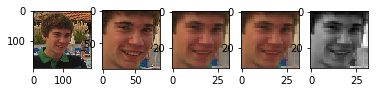

(90, 89, 3) (32, 32, 3) (32, 32, 3) (32, 32, 1)
(1024,)
0.3350759658394608


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


img_path = os.path.join(src_pth, "test/005694.jpg")
img = face_recognition.load_image_file(img_path)

locations = face_recognition.face_locations(img)
encodings = face_recognition.face_encodings(img, locations)

for encoding, location in zip(encodings, locations):
    top, right, bottom, left = location
    face = img[top:bottom, left:right]
    rsz = imutils.resize(face, width=32, height=32)
    cropped = rsz[0:32, 0:32]
    gray = rgb2gray(cropped)
    # display images
    fig, ax = plt.subplots(1,5)
    ax[0].imshow(img)
    ax[1].imshow(face)
    ax[2].imshow(rsz)
    ax[3].imshow(cropped)
    ax[4].imshow(gray, cmap='gray')
    plt.show();
    
    gray = np.expand_dims(rgb2gray(cropped), axis=-1)
    
    print(face.shape, rsz.shape, cropped.shape, gray.shape)
    print(gray.ravel().shape)
    print(np.mean(gray.ravel()))

31 32 3
(32, 32, 3)


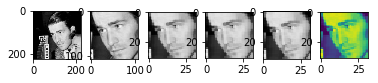

(107, 108, 3) (31, 32, 3) (31, 32, 3) (32, 32, 3)
(2976,)
(3072,)
0.5943034471853257


In [23]:

img_path = os.path.join(src_pth, "test/005822.jpg")
img = face_recognition.load_image_file(img_path)

locations = face_recognition.face_locations(img)
encodings = face_recognition.face_encodings(img, locations)

for encoding, location in zip(encodings, locations):
    top, right, bottom, left = location
    face = img[top:bottom, left:right]
    rsz = imutils.resize(face, width=32)
    cropped = rsz[0:32, 0:32]
    
    width, height, depth = cropped.shape
    print(width, height, depth)
    padded = np.pad(cropped, ((32-width, 0), (0,0), (0,0)), 'constant', constant_values=0)
    print(padded.shape)
    gray = rgb2gray(cropped)
    # display images
    fig, ax = plt.subplots(1,6)
    ax[0].imshow(img)
    ax[1].imshow(face)
    ax[2].imshow(rsz)
    ax[3].imshow(cropped)
    ax[4].imshow(padded)
    ax[5].imshow(gray)
    plt.show();
    
    print(face.shape, rsz.shape, cropped.shape, padded.shape)
    print(cropped.ravel().shape)
    print(padded.ravel().shape)
    print(np.mean(gray.ravel()))

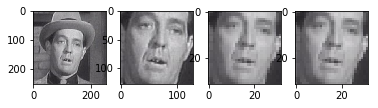

(129, 129, 3) (32, 32, 3) (32, 32, 3)
(3072,)
0.5248401060814951


In [24]:

img_path = os.path.join(src_pth, "test/005977.jpg")
img = face_recognition.load_image_file(img_path)

locations = face_recognition.face_locations(img)
encodings = face_recognition.face_encodings(img, locations)

for encoding, location in zip(encodings, locations):
    top, right, bottom, left = location
    face = img[top:bottom, left:right]
    rsz = imutils.resize(face, width=32, height=32)
    cropped = rsz[0:32, 0:32]
    gray = rgb2gray(cropped)
    # display images
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(img)
    ax[1].imshow(face)
    ax[2].imshow(rsz)
    ax[3].imshow(cropped)
    plt.show();
    
    print(face.shape, rsz.shape, cropped.shape)
    print(cropped.ravel().shape)
    print(np.mean(gray.ravel()))

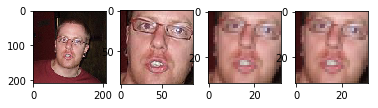

(90, 89, 3) (32, 32, 3) (32, 32, 3)
(3072,)
0.5061066593903185


In [25]:

img_path = os.path.join(src_pth, "test/006186.jpg")
img = face_recognition.load_image_file(img_path)

locations = face_recognition.face_locations(img)
encodings = face_recognition.face_encodings(img, locations)

for encoding, location in zip(encodings, locations):
    top, right, bottom, left = location
    face = img[top:bottom, left:right]
    rsz = imutils.resize(face, width=32, height=32)
    cropped = rsz[0:32, 0:32]
    gray = rgb2gray(cropped)
    # display images
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(img)
    ax[1].imshow(face)
    ax[2].imshow(rsz)
    ax[3].imshow(cropped)
    plt.show();
    
    print(face.shape, rsz.shape, cropped.shape)
    print(cropped.ravel().shape)
    print(np.mean(gray.ravel()))

In [52]:
from scipy.misc import imsave


face_pth = os.path.join('./', 'binary_faces')


if not os.path.exists(face_pth):
    os.makedirs(face_pth)


def encode_binary(writer, source_set, label_set):

    counter = 0
    for image in source_set:
        if '(' in str(image) and ')' in str(image):
          # skip duplicates
          continue
        idx = str(image).split('/')[-1]
        try:
          img = face_recognition.load_image_file(image)
        except:
          # avoid div by zero
          continue
        locations = face_recognition.face_locations(img)
        encodings = face_recognition.face_encodings(img, locations)

        for encoding, location in zip(encodings, locations):
            y = label_set .loc[idx]

            top, right, bottom, left = location
            face = img[top:bottom, left:right]
            rsz = imutils.resize(face, width=32, height=32)
            cropped = rsz[0:32, 0:32]
            width, height, depth = cropped.shape
            padded = np.pad(cropped, ((32-width, 0), (0,0), (0,0)), 'constant', constant_values=0)
            gray = rgb2gray(padded)
            
            # save image
            imsave(
                os.path.join(
                    face_pth,
                    '{}.png'.format(
                        str(counter).zfill(4)
                    )
                ),
                gray
            )
            
            gray = np.expand_dims(gray, axis=-1)

            
            assert gray.ravel().shape == (1024,)
            

            feature = {
                'enc': tf.train.Feature(float_list=tf.train.FloatList(value=encoding)),
                'age': tf.train.Feature(int64_list=tf.train.Int64List(value=y)),
                'img': tf.train.Feature(bytes_list=tf.train.BytesList(value=[gray.tostring()]))
            }

            record = tf.train.Example(features=tf.train.Features(feature=feature))

            writer.write(record.SerializeToString())

        counter += 1
        if counter % 1000 == 0:
            print("Complete: {}".format(counter))

In [53]:
if not os.path.exists(tgt_pth):
    os.makedirs(tgt_pth)


target_file = os.path.join(tgt_pth, 'train-temp.tfrecords')

with tf.python_io.TFRecordWriter(target_file) as writer:
    
    print("Processing Training:")
    
    encode_binary(writer, train_set, train_y)

    print("Processing Validation:")
    encode_binary(writer, val_set, val_y)

    print("Processing Testing:")
    encode_binary(writer, test_set, test_y)

print("Complete, Thank you!")

Processing Training:


/home/qamaruddin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Processing Validation:


/home/qamaruddin/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/qamaruddin/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/qamaruddin/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/qamaruddin/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 178 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/qamaruddin/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWa

Complete: 1000
Processing Testing:
Complete: 1000
Complete, Thank you!
